<a href="https://colab.research.google.com/github/tasosnikitakis/Data_Science_Notebooks/blob/main/FBREF_data_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_html('https://fbref.com/en/comps/11/2022-2023/2022-2023-Serie-A-Stats')

In [69]:
squad_misc_stats.columns

Index(['Fls', 'Fld', 'Off'], dtype='object')

In [68]:
squad_standard_stats = df[2]
squad_standard_stats.columns = squad_standard_stats.columns.droplevel()
squad_standard_stats = squad_standard_stats.iloc[:, 0:22]
squad_standard_stats = squad_standard_stats.drop(['# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'G+A', 'G-PK', 'npxG', 'xAG',
       'npxG+xAG'], axis=1)
squad_goalkeeping_stats = df[4]
squad_goalkeeping_stats.columns = squad_goalkeeping_stats.columns.droplevel()
squad_goalkeeping_stats = squad_goalkeeping_stats.drop(['Squad', '# Pl', 'MP', 'Starts', 'Min', '90s', 'GA90', 'Save%', 'W', 'D', 'L', 'CS%', 'PKatt', 'PKA', 'PKsv', 'PKm', 'Save%'], axis=1)
squad_advanced_goalkeeping_stats = df[6]
squad_advanced_goalkeeping_stats.columns = squad_advanced_goalkeeping_stats.columns.droplevel()
squad_advanced_goalkeeping_stats = squad_advanced_goalkeeping_stats['PSxG']
squad_shooting_stats = df[8]
squad_shooting_stats.columns = squad_shooting_stats.columns.droplevel()
squad_shooting_stats = squad_shooting_stats.drop(['Squad', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh',
       'G-xG', 'np:G-xG'], axis=1)
squad_passing_stats = df[10]
squad_passing_stats.columns = squad_passing_stats.columns.droplevel()
squad_passing_stats = squad_passing_stats.iloc[:, 0:8]
squad_passing_stats = squad_passing_stats.drop(['Squad', '# Pl', '90s', 'Cmp%'], axis=1)
squad_pass_type_stats = df[12]
squad_pass_type_stats.columns = squad_pass_type_stats.columns.droplevel()
squad_pass_type_stats = squad_pass_type_stats.drop(['Squad', '# Pl', '90s', 'Att', 'Live', 'Dead', 'FK', 'TI', 'In', 'Out', 'Str', 'Cmp', 'Off', 'Blocks'], axis=1)
squad_goal_and_shot_creation_stats = df[14]
squad_goal_and_shot_creation_stats.columns = squad_goal_and_shot_creation_stats.columns.droplevel()
squad_goal_and_shot_creation_stats = squad_goal_and_shot_creation_stats.iloc[:, 0:12]
squad_goal_and_shot_creation_stats = squad_goal_and_shot_creation_stats.drop(['Squad', '# Pl', '90s', 'SCA', 'SCA90', 'Sh', 'Fld', 'Def', 'GCA'], axis=1)
squad_defensive_action_stats = df[16]
squad_defensive_action_stats.columns = squad_defensive_action_stats.columns.droplevel()
squad_defensive_action_stats = squad_defensive_action_stats.drop(['Squad', '# Pl', '90s', 'Tkl', 'Def 3rd', 'Mid 3rd',
       'Tkl', 'Att', 'Tkl%', 'Sh', 'Pass', 'Tkl+Int',
       'Clr'], axis=1)
squad_possesion_stats = df[18]
squad_possesion_stats.columns = squad_possesion_stats.columns.droplevel()
squad_possesion_stats = squad_possesion_stats.drop(['Squad', '# Pl', 'Poss', '90s', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Att', 'Succ', 'Tkld', 'Tkld%', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR'], axis=1)
squad_misc_stats = df[22]
squad_misc_stats.columns = squad_misc_stats.columns.droplevel()
squad_misc_stats = squad_misc_stats.drop(['Squad', '# Pl', '90s', 'CrdY', 'CrdR', '2CrdY',
       'Crs', 'Int', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'Won', 'Lost',
       'Won%'], axis=1)

In [83]:
def create_feature_datasets(url):
  stats_list = []
  df = pd.read_html(url)
  squad_standard_stats = df[2]
  squad_standard_stats.columns = squad_standard_stats.columns.droplevel()
  squad_standard_stats = squad_standard_stats.iloc[:, 0:22]
  squad_standard_stats = squad_standard_stats.drop(['# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s', 'G+A', 'G-PK', 'npxG', 'xAG', 'npxG+xAG'], axis=1)
  squad_goalkeeping_stats = df[4]
  squad_goalkeeping_stats.columns = squad_goalkeeping_stats.columns.droplevel()
  squad_goalkeeping_stats = squad_goalkeeping_stats.drop(['Squad', '# Pl', 'MP', 'Starts', 'Min', '90s', 'GA90', 'Save%', 'W', 'D', 'L', 'CS%', 'PKatt', 'PKA', 'PKsv', 'PKm', 'Save%'], axis=1)
  squad_advanced_goalkeeping_stats = df[6]
  squad_advanced_goalkeeping_stats.columns = squad_advanced_goalkeeping_stats.columns.droplevel()
  squad_advanced_goalkeeping_stats = squad_advanced_goalkeeping_stats['PSxG']
  squad_shooting_stats = df[8]
  squad_shooting_stats.columns = squad_shooting_stats.columns.droplevel()
  squad_shooting_stats = squad_shooting_stats.drop(['Squad', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG'], axis=1)
  squad_passing_stats = df[10]
  squad_passing_stats.columns = squad_passing_stats.columns.droplevel()
  squad_passing_stats = squad_passing_stats.iloc[:, 0:8]
  squad_passing_stats = squad_passing_stats.drop(['Squad', '# Pl', '90s', 'Cmp%'], axis=1)
  squad_pass_type_stats = df[12]
  squad_pass_type_stats.columns = squad_pass_type_stats.columns.droplevel()
  squad_pass_type_stats = squad_pass_type_stats.drop(['Squad', '# Pl', '90s', 'Att', 'Live', 'Dead', 'FK', 'TI', 'In', 'Out', 'Str', 'Cmp', 'Off', 'Blocks'], axis=1)
  squad_goal_and_shot_creation_stats = df[14]
  squad_goal_and_shot_creation_stats.columns = squad_goal_and_shot_creation_stats.columns.droplevel()
  squad_goal_and_shot_creation_stats = squad_goal_and_shot_creation_stats.iloc[:, 0:12]
  squad_goal_and_shot_creation_stats = squad_goal_and_shot_creation_stats.drop(['Squad', '# Pl', '90s', 'SCA', 'SCA90', 'Sh', 'Fld', 'Def', 'GCA'], axis=1)
  squad_defensive_action_stats = df[16]
  squad_defensive_action_stats.columns = squad_defensive_action_stats.columns.droplevel()
  squad_defensive_action_stats = squad_defensive_action_stats.drop(['Squad', '# Pl', '90s', 'Tkl', 'Def 3rd', 'Mid 3rd', 'Tkl', 'Att', 'Tkl%', 'Sh', 'Pass', 'Tkl+Int', 'Clr'], axis=1)
  squad_possesion_stats = df[18]
  squad_possesion_stats.columns = squad_possesion_stats.columns.droplevel()
  squad_possesion_stats = squad_possesion_stats.drop(['Squad', '# Pl', 'Poss', '90s', 'Def Pen', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att Pen', 'Live', 'Att', 'Succ', 'Tkld', 'Tkld%', 'PrgC', '1/3', 'CPA', 'Mis', 'Dis', 'Rec', 'PrgR'], axis=1)
  squad_misc_stats = df[22]
  squad_misc_stats.columns = squad_misc_stats.columns.droplevel()
  squad_misc_stats = squad_misc_stats.drop(['Squad', '# Pl', '90s', 'CrdY', 'CrdR', '2CrdY', 'Crs', 'Int', 'TklW', 'PKwon', 'PKcon', 'OG', 'Recov', 'Won', 'Lost', 'Won%'], axis=1)
  stats_list = [squad_standard_stats, squad_goalkeeping_stats, squad_advanced_goalkeeping_stats, squad_shooting_stats, squad_passing_stats, squad_pass_type_stats, squad_goal_and_shot_creation_stats, squad_defensive_action_stats, squad_possesion_stats, squad_misc_stats]
  return stats_list

In [77]:
stats_list = [squad_standard_stats, squad_goalkeeping_stats, squad_advanced_goalkeeping_stats, squad_shooting_stats, squad_passing_stats, squad_pass_type_stats, squad_goal_and_shot_creation_stats, squad_defensive_action_stats, squad_possesion_stats, squad_misc_stats]

In [78]:
SerieA_stats_2023_2024 = pd.concat([squad_standard_stats, squad_goalkeeping_stats, squad_advanced_goalkeeping_stats, squad_shooting_stats, squad_passing_stats, squad_pass_type_stats, squad_goal_and_shot_creation_stats, squad_defensive_action_stats, squad_possesion_stats, squad_misc_stats], axis=1)

In [81]:
SerieA_stats_2023_2024

,Squad,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,PrgC,PrgP,...,Int,Err,Touches,Succ%,Carries,TotDist,PrgDist,Fls,Fld,Off
0,Atalanta,64,42,6,8,83,3,57.7,687,1637,...,421,12,23862,43.3,13148,67208,33188,470,385,58
1,Bologna,52,41,6,6,84,3,43.8,564,1366,...,302,7,24552,46.7,14223,70806,35047,477,426,77
2,Cremonese,35,18,5,7,81,3,38.7,521,1107,...,393,13,19346,41.7,9843,51780,26321,458,407,68
3,Empoli,35,20,2,2,88,7,38.8,608,1114,...,280,4,21188,44.4,11736,64438,31714,441,459,54
4,Fiorentina,51,37,4,6,93,3,55.0,789,1627,...,260,11,23123,45.9,13434,77635,39528,488,511,56
5,Hellas Verona,29,22,1,1,103,3,35.8,503,1063,...,337,12,18056,43.7,8665,47590,22382,540,383,74
6,Inter,68,50,4,5,65,3,68.0,668,1624,...,315,7,25128,43.7,14972,75152,38723,444,406,68
7,Juventus,56,41,3,6,74,6,55.3,673,1394,...,307,10,22810,46.6,12888,66636,34490,456,409,62
8,Lazio,59,37,6,8,86,2,51.1,683,1381,...,310,8,25453,46.6,14379,73160,36610,400,471,54
9,Lecce,31,21,4,6,86,2,36.1,515,1232,...,368,4,18839,42.9,9288,51809,25326,553,439,68


In [86]:
url = "https://fbref.com/en/comps/11/2021-2022/2021-2022-Serie-A-Stats"
stats_list_2021_2022 = create_feature_datasets(url)
SerieA_stats_2021_2022 = pd.concat(stats_list_2021_2022, axis=1)

In [87]:
SerieA_stats_2021_2022

,Squad,Gls,Ast,PK,PKatt,CrdY,CrdR,xG,PrgC,PrgP,...,Int,Err,Touches,Succ%,Carries,TotDist,PrgDist,Fls,Fld,Off
0,Atalanta,62,48,5,6,87,2,62.5,796,1858,...,441,6,25624,54.8,14869,76829,38201,513,454,68
1,Bologna,43,34,4,5,92,7,44.9,540,1276,...,370,5,22181,54.5,11905,63323,30938,443,497,56
2,Cagliari,34,26,3,4,96,5,39.0,474,1088,...,397,5,19878,52.6,10278,51842,25151,549,490,70
3,Empoli,47,27,7,7,87,5,44.9,658,1477,...,352,10,20894,53.2,11739,64693,34764,506,463,83
4,Fiorentina,59,33,9,12,89,8,60.0,755,1584,...,244,15,24439,55.5,14623,77944,39314,464,565,57
5,Genoa,26,19,6,7,92,3,37.2,517,1101,...,449,15,20229,52.0,10185,50318,24651,566,499,72
6,Hellas Verona,63,44,7,8,100,7,50.4,677,1587,...,392,9,21791,53.1,11502,60870,30016,560,429,97
7,Inter,83,57,7,11,71,0,81.6,782,1778,...,332,11,25692,54.1,15187,75463,39052,466,412,57
8,Juventus,56,37,5,6,77,2,51.4,701,1464,...,332,9,23918,57.6,13534,68320,34106,508,503,74
9,Lazio,74,48,7,9,88,5,55.3,788,1527,...,315,10,26867,54.8,15747,79463,41085,441,450,44


In [ ]:
shooting = pd.read_html('https://fbref.com/en/comps/12/shooting/La-Liga-Stats')

In [ ]:
for idx,table in enumerate(shooting):
    print("********************")
    print(idx)
    print(table)

********************
0
   Unnamed: 0_level_0 Unnamed: 1_level_0 Unnamed: 2_level_0 Standard          \
                Squad               # Pl                90s      Gls  Sh SoT   
0              Alavés                 16                1.0        0  10   2   
1             Almería                 20                2.0        1  39  13   
2       Athletic Club                 18                2.0        2  15   3   
3     Atlético Madrid                 19                2.0        3  19   7   
4           Barcelona                 18                2.0        2  37  13   
5               Betis                 17                2.0        2  26   5   
6               Cádiz                 19                2.0        1  22   4   
7          Celta Vigo                 18                2.0        1  28   6   
8              Getafe                 16                2.0        0  14   4   
9              Girona                 17                2.0        4  13   7   
10            Gra

In [ ]:
shooting = pd.DataFrame(shooting[0])

In [ ]:
shooting.columns = shooting.columns.droplevel()

In [ ]:
shooting.columns

Index(['Squad', '# Pl', '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90',
       'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh',
       'G-xG', 'np:G-xG'],
      dtype='object')

In [ ]:
shooting

,Squad,# Pl,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Alavés,16,1.0,0,10,2,20.0,10.0,2.0,0.00,0.00,22.1,0,0,0,0.3,0.3,0.03,-0.3,-0.3
1,Almería,20,2.0,1,39,13,33.3,19.5,6.5,0.03,0.08,18.5,0,0,0,2.7,2.7,0.07,-1.7,-1.7
2,Athletic Club,18,2.0,2,15,3,20.0,7.5,1.5,0.13,0.67,15.7,1,0,0,2.0,2.0,0.13,0.0,0.0
3,Atlético Madrid,19,2.0,3,19,7,36.8,9.5,3.5,0.16,0.43,14.3,0,0,0,2.8,2.8,0.15,0.2,0.2
4,Barcelona,18,2.0,2,37,13,35.1,18.5,6.5,0.05,0.15,17.2,3,0,0,4.6,4.6,0.13,-2.6,-2.6
5,Betis,17,2.0,2,26,5,19.2,13.0,2.5,0.08,0.40,17.8,1,0,0,1.8,1.8,0.07,0.2,0.2
6,Cádiz,19,2.0,1,22,4,18.2,11.0,2.0,0.05,0.25,15.1,1,0,0,1.8,1.8,0.08,-0.8,-0.8
7,Celta Vigo,18,2.0,1,28,6,21.4,14.0,3.0,0.04,0.17,17.1,1,0,0,2.0,2.0,0.08,-1.0,-1.0
8,Getafe,16,2.0,0,14,4,28.6,7.0,2.0,0.00,0.00,17.1,1,0,0,1.3,1.3,0.09,-1.3,-1.3
9,Girona,17,2.0,4,13,7,53.8,6.5,3.5,0.31,0.57,14.3,1,0,0,2.2,2.2,0.17,1.8,1.8


In [ ]:
top4 = ['Real Madrid','Sevilla','Barcelona','Atlético Madrid']

In [ ]:
subset_shooting = shooting[shooting['Squad'].isin(top4)]

''

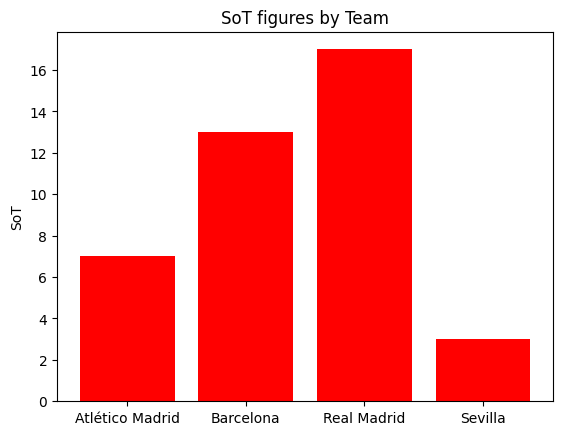

In [ ]:
plt.bar(subset_shooting['Squad'],subset_shooting['SoT'], color = 'red')
plt.title('SoT figures by Team')
plt.ylabel('SoT')
;

Specify URLS



In [ ]:
urls = ['https://fbref.com/en/comps/9/2021-2022/schedule/2021-2022-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2020-2021/schedule/2020-2021-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2019-2020/schedule/2019-2020-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2018-2019/schedule/2018-2019-Premier-League-Scores-and-Fixtures',
        'https://fbref.com/en/comps/9/2017-2018/schedule/2017-2018-Premier-League-Scores-and-Fixtures']

Loop through the URL list and append them to a pandas dataframe.



In [ ]:
epl_df_list = []

for url in urls:
    epl_df_list.append(pd.read_html(url,index_col=False)[0])
    epl_df = pd.concat(epl_df_list, axis=0, ignore_index=True)

Remove the NAN values



In [ ]:
epl_df = epl_df[epl_df['Wk'].notna()]

Rename the XG columns

In [ ]:
epl_df = epl_df.rename(columns={'xG':'xGHome'
                   ,'xG.1':'xGAway'})

Add the scores columns by slicing.



In [ ]:
epl_df['HomeScore'] = epl_df['Score'].str[0]
epl_df['AwayScore'] = epl_df['Score'].str[2]

Drop the irrelevant fields



In [ ]:
epl_df = epl_df.drop(['Match Report','Notes'],axis=1)


Order by date

In [ ]:
#convert to date

epl_df['Date'] = pd.to_datetime(epl_df['Date'])

In [ ]:
epl_df.sort_values(by='Date', inplace=True)

In [ ]:
epl_df = epl_df[['Wk','Day','Date','Time','Home','HomeScore','xGHome','AwayScore','xGAway','Away','Attendance','Venue','Referee']]

In [ ]:
epl_df

,Wk,Day,Date,Time,Home,HomeScore,xGHome,AwayScore,xGAway,Away,Attendance,Venue,Referee
1732,1.0,Fri,2017-08-11,19:45,Arsenal,4,2.5,3,1.5,Leicester City,59387.0,Emirates Stadium,Mike Dean
1739,1.0,Sat,2017-08-12,17:30,Brighton,0,0.3,2,1.9,Manchester City,30415.0,The American Express Community Stadium,Michael Oliver
1733,1.0,Sat,2017-08-12,12:30,Watford,3,2.1,3,2.6,Liverpool,20407.0,Vicarage Road Stadium,Anthony Taylor
1734,1.0,Sat,2017-08-12,15:00,Crystal Palace,0,1.1,3,1.5,Huddersfield,25448.0,Selhurst Park,Jonathan Moss
1735,1.0,Sat,2017-08-12,15:00,West Brom,1,1.3,0,0.5,Bournemouth,25011.0,The Hawthorns,Robert Madley
...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,38.0,Sun,2022-05-22,16:00,Leicester City,4,3.4,1,1.1,Southampton,32003.0,King Power Stadium,Jonathan Moss
438,38.0,Sun,2022-05-22,16:00,Brentford,1,0.8,2,1.3,Leeds United,16957.0,Brentford Community Stadium,Paul Tierney
446,38.0,Sun,2022-05-22,16:00,Burnley,1,1.6,2,1.8,Newcastle Utd,21361.0,Turf Moor,Craig Pawson
440,38.0,Sun,2022-05-22,16:00,Crystal Palace,1,0.6,0,0.7,Manchester Utd,25434.0,Selhurst Park,Martin Atkinson
